In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import pickle
import os.path
import seaborn
import pickle
import os.path
from numpy import linalg

import matplotlib.pyplot as plt

import matplotlib as mpl

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 


In [2]:
# 读取表格
os.chdir('/home/zhh/文档/阿里巴巴/data/2联表/')
with open('train_and_id.pickle','rb') as f1:
    data = pickle.load(f1)   

In [ ]:
# 标签进行比编码统一
data.drop(895420,inplace= True)
data['标签'] = data['标签'].map(int)

In [ ]:
data.tail()

In [ ]:
#删除空值较多的字段
data.drop(['一次性医用材料拒付金额','农民工医疗救助计算金额','残疾军人医疗补助基金支付金额',
           '公务员医疗补助基金支付金额','补助审批金额','城乡救助补助金额'],axis=1
         ,inplace= True)

In [ ]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_1.pickle','wb') as f1:
    pickle.dump(data,f1)


In [37]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_1.pickle','rb') as f1:
    data = pickle.load(f1)

In [ ]:
#药品费发生金额画出散点图
def plot_scatter_fee(columns):
    plt.figure(figsize=(8,6))  #图像大小
    plt.title(columns)  
    sns.stripplot(y=columns, x="标签", data=data, jitter=0.05)
    #plt.savefig(columns+'.png')  #保存图像
    plt.show()
    

In [ ]:
fee_columns_list = []   #用于储存含有金额字眼的特征
for i in data.columns:  #
    if '金额' in i:      #含有金额的装起来
        fee_columns_list.append(i)  
for i in fee_columns_list: 
    plot_scatter_fee(i)  #画散点图

In [76]:
#画出药品费发生经费的分布曲线图
def plot_kde_curve(columns):
    fig, ax0=plt.subplots(figsize=(150,50))
    data[data['标签']==1][columns].plot('hist',bins=100,ax=ax0,color='r')
    data[data['标签']==0][columns].plot('hist',bins=100,ax=ax0,color='b')
    ax0.set_xlim([0,200])
    ax0.set(ylabel='概率',xlabel=columns)
    ax0.legend(['骗保','非骗保'])
    plt.show()

In [38]:
#删除金额都是0的特征
drop_list = []
fee_columns_list = []   #用于储存含有金额字眼的特征
for i in data.columns:  #
    if '金额' in i:      #含有金额的装起来
        fee_columns_list.append(i)  
        
fee_list_copy = fee_columns_list.copy()
for i in fee_list_copy: 
    if data[i].unique().shape[0]==1:
        print(i,data[i].unique())
        drop_list.append(i)
        fee_columns_list.remove(i)
data = data.drop(drop_list,axis=1)

药品费拒付金额 [ 0.]
检查费拒付金额 [ 0.]
治疗费拒付金额 [ 0.]
手术费拒付金额 [ 0.]
床位费拒付金额 [ 0.]
医用材料费拒付金额 [ 0.]
输全血申报金额 [ 0.]
成分输血自费金额 [ 0.]
成分输血拒付金额 [ 0.]
其它拒付金额 [ 0.]
输全血按比例自负金额 [ 0.]
最高限额以上金额 [ 0.]
统筹拒付金额 [ 0.]


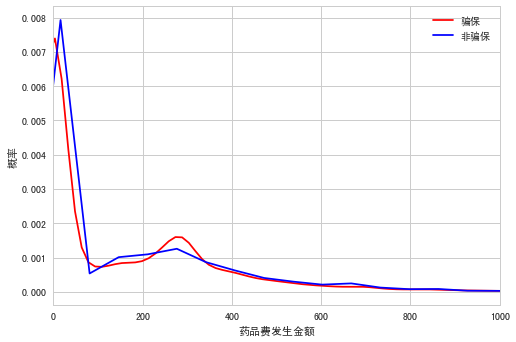

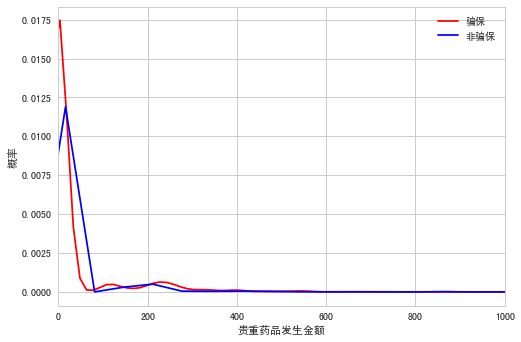

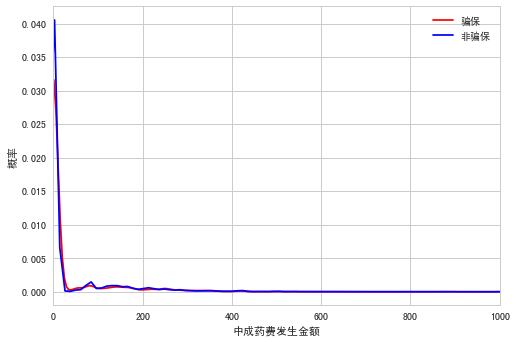

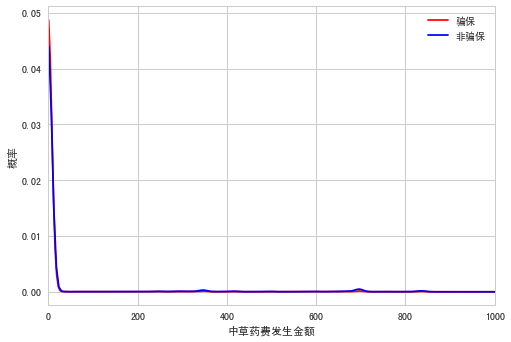

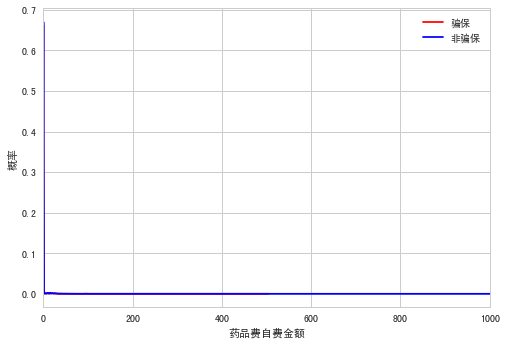

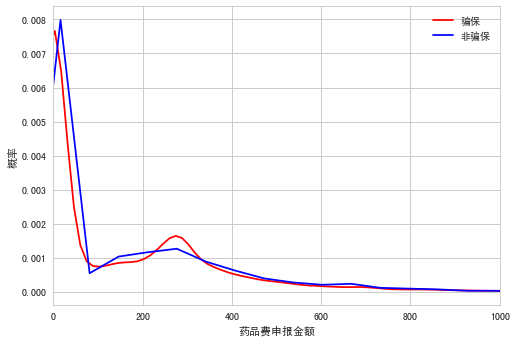

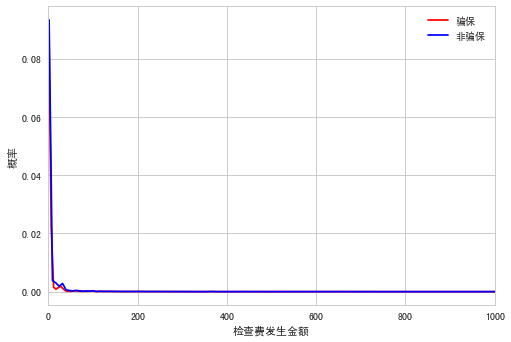

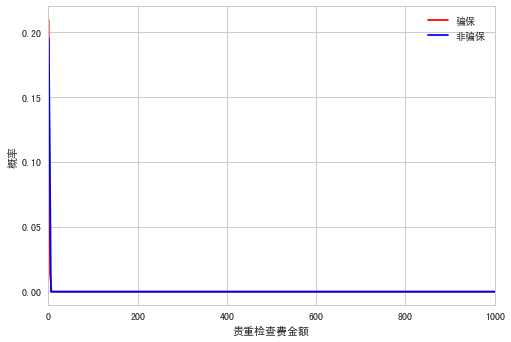

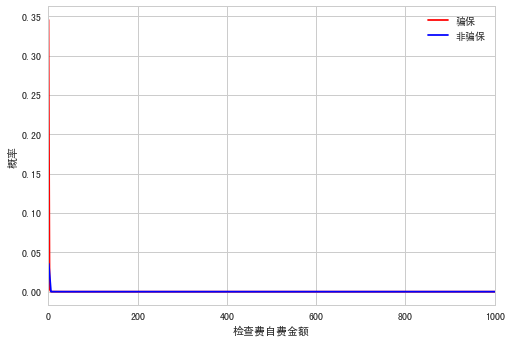

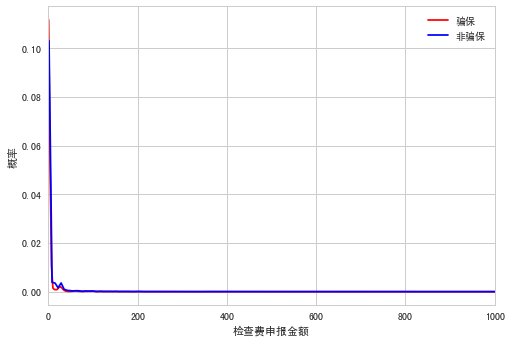

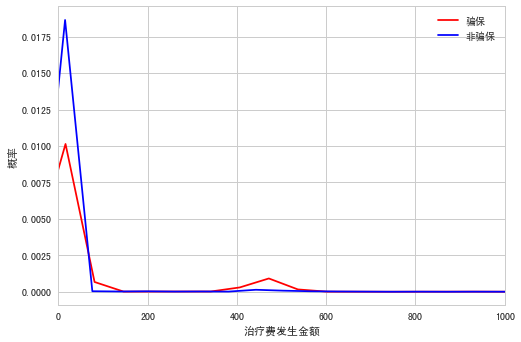

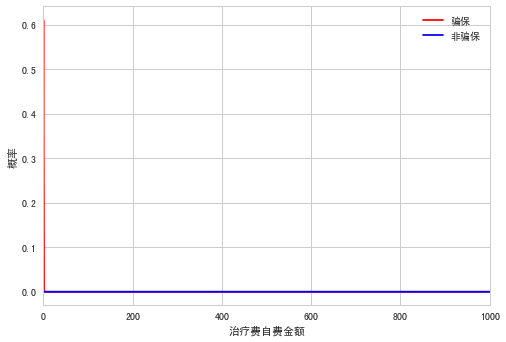

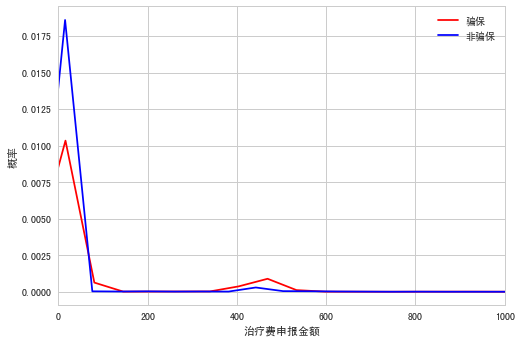

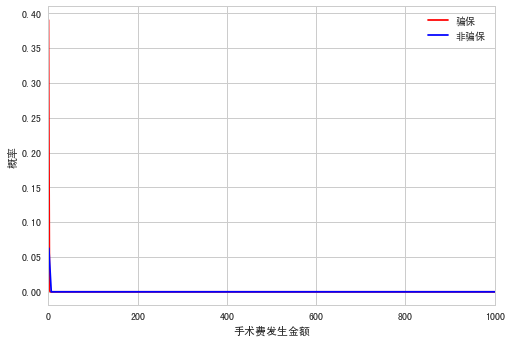

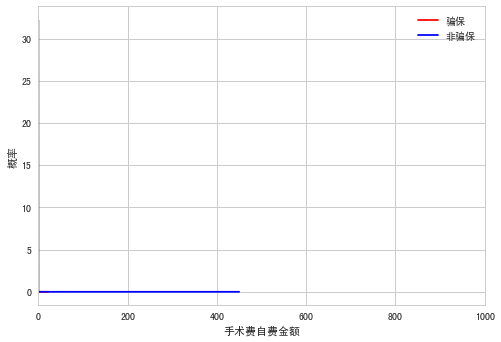

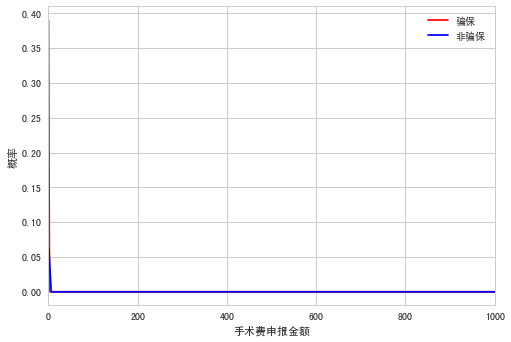

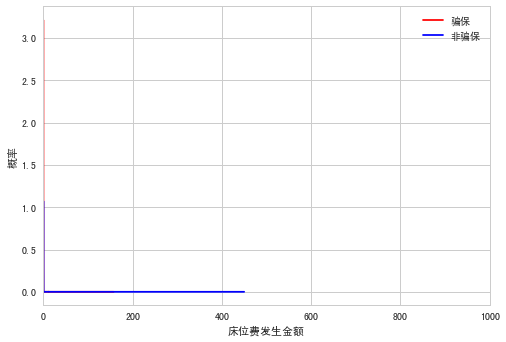

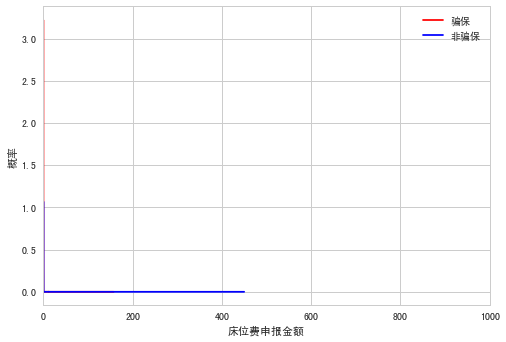

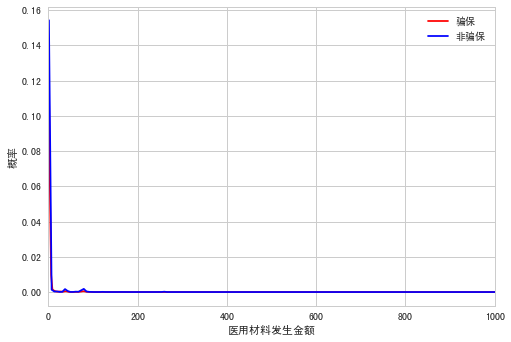

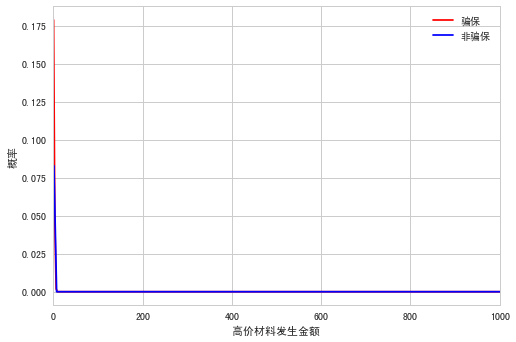

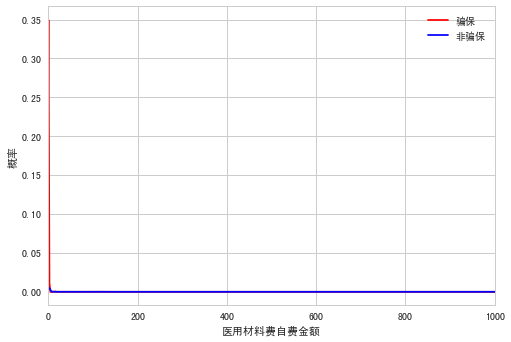

输全血申报金额
成分输血拒付金额


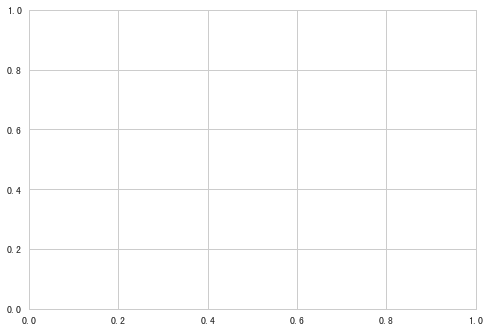

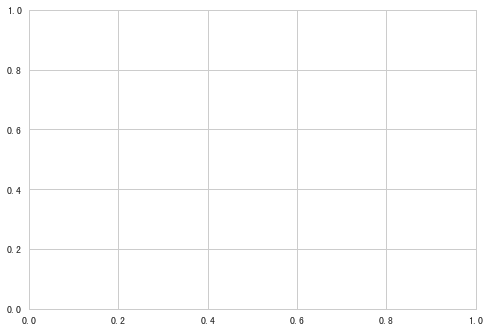

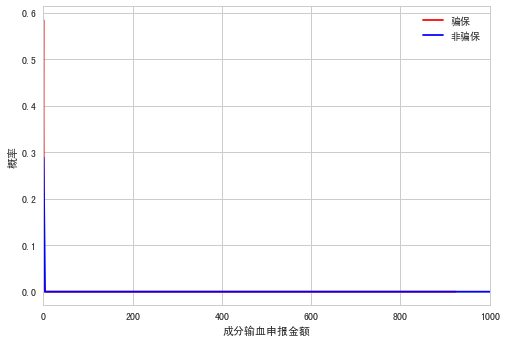

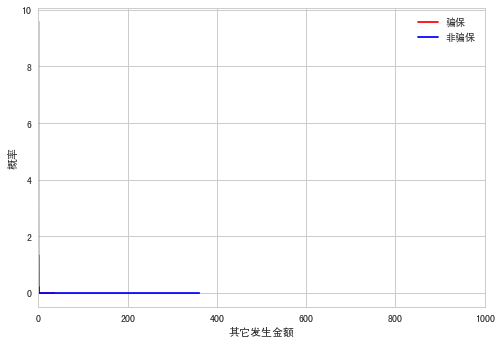

其它申报金额
一次性医用材料自费金额


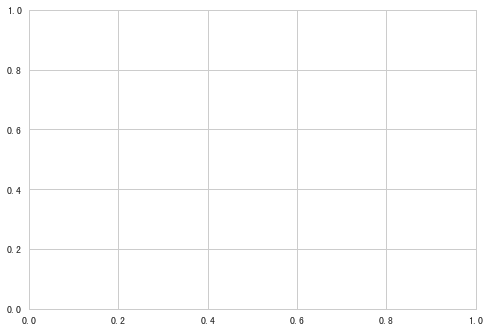

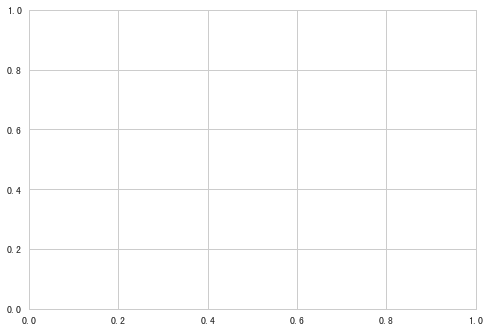

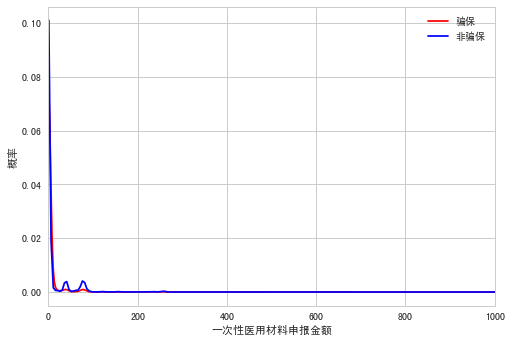

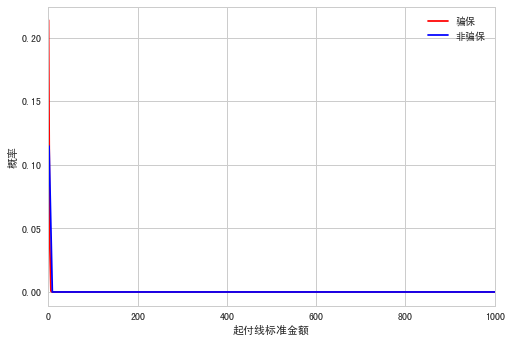

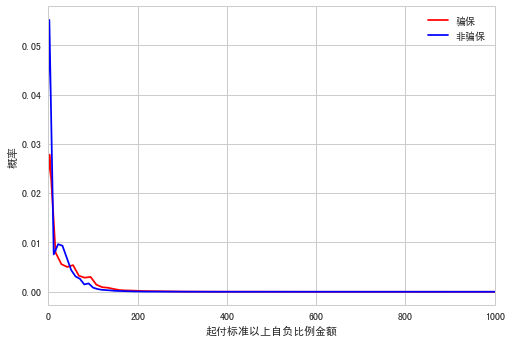

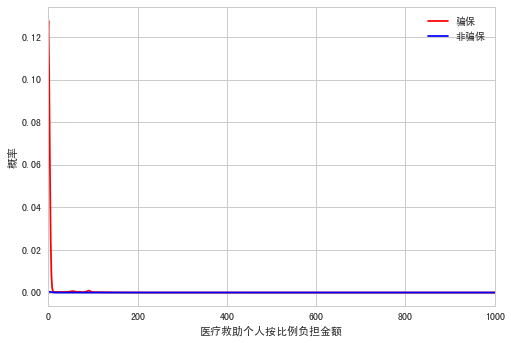

统筹拒付金额


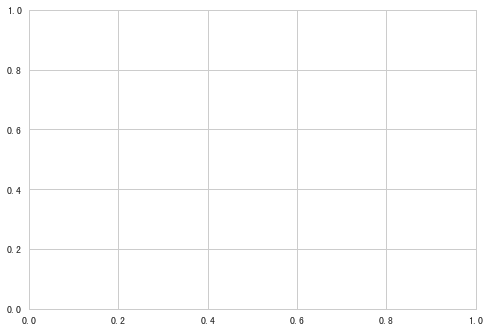

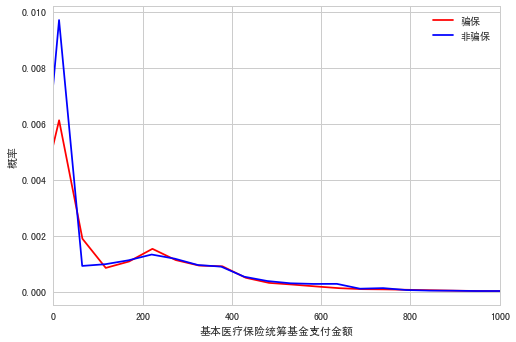

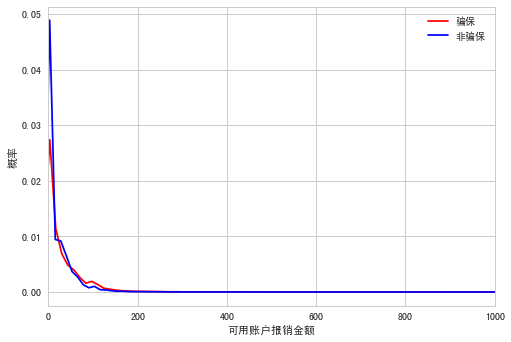

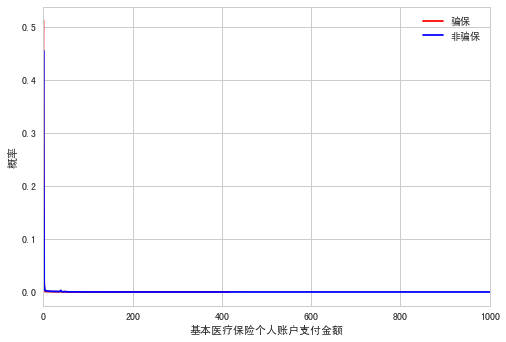

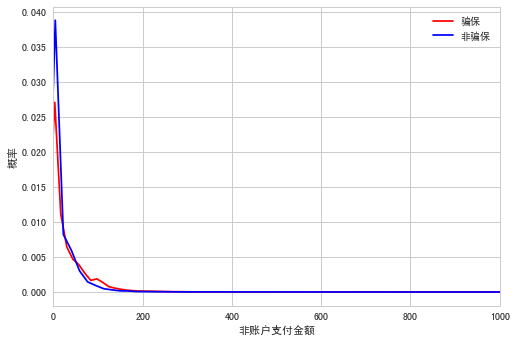

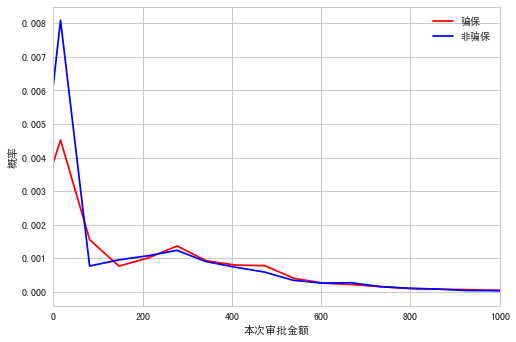

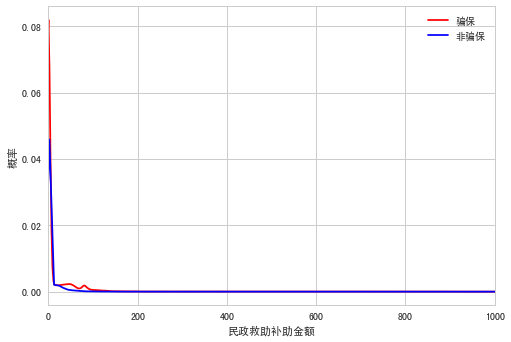

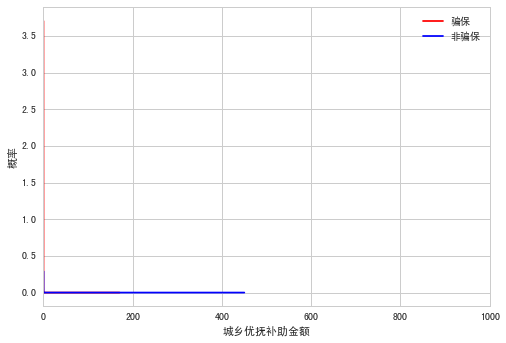

非典补助补助金额


In [7]:
#画曲线图 
for i in fee_columns_list: 
    try:
        plot_kde_curve(i)#画出分布曲线
    except linalg.LinAlgError:
        print(i)
        pass

In [48]:
#查看无法画图的金额项
un_plot_fee = ['非典补助补助金额','其它申报金额','一次性医用材料自费金额']
for i in un_plot_fee:
    print('*******************')
    print(data[i].value_counts())
    print('*************************')
#删除类别小的特征
data = data.drop(un_plot_fee,axis=1)

*******************
0.0    894623
Name: 非典补助补助金额, dtype: int64
*************************
*******************
0.0      895416
75.0          3
120.0         1
Name: 其它申报金额, dtype: int64
*************************
*******************
0.0    276929
Name: 一次性医用材料自费金额, dtype: int64
*************************


In [50]:
#保存中间结果
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_3.pickle','wb') as f1:
    pickle.dump(data,f1)

In [53]:
no_fee_cols=[]
for i in data.columns:
    if '金额' not in i and '号' not in i and '编码' not in i:
        no_fee_cols.append(i)
print(no_fee_cols)

['交易时间', '双笔退费标识', '住院开始时间', '住院终止时间', '住院天数', '申报受理时间', '出院诊断病种名称', '医疗救助医院申请', '家床起付线剩余', '操作时间', '标签']


In [56]:
for i in no_fee_cols:
    print('*************************')
    print(i)
    print(data[i].unique())
    print('****************************')

*************************
交易时间
['2016-07-01' '2016-01-13' '2016-01-15' '2016-02-29' '2016-03-11'
 '2016-07-02' '2016-07-03' '2016-07-04' '2016-07-05' '2016-07-06'
 '2016-07-07' '2016-07-08' '2016-07-09' '2016-07-10' '2016-07-11'
 '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15' '2016-07-16'
 '2016-07-17' '2016-07-18' '2016-07-19' '2016-07-20' '2016-07-21'
 '2016-07-22' '2016-07-23' '2016-07-24' '2016-07-25' '2016-07-26'
 '2016-07-27' '2016-07-29' '2016-07-28' '2016-07-30' '2016-07-31'
 '2016-08-03' '2016-08-04' '2016-08-05' '2016-08-09' '2016-08-07'
 '2016-08-08' '2016-08-06' '2016-08-15' '2016-08-13' '2016-08-12'
 '2016-08-10' '2016-08-11' '2016-08-14' '2016-08-16' '2016-08-17'
 '2016-08-18' '2016-08-19' '2016-08-23' '2016-08-20' '2016-08-22'
 '2016-08-21' '2016-08-24' '2016-08-25' '2016-08-29' '2016-08-27'
 '2016-08-26' '2016-08-30' '2016-08-28' '2016-08-31' '2016-08-01'
 '2016-08-02' '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-10'
 '2016-09-11' '2016-09-06' '2016-09-12' '2016

In [86]:
a=pd.Series(['2017-6-8','2018-8-1'])
b=pd.to_datetime(a)

In [144]:
def convert_time(time):
    if pd.Series(time).notnull().item():
        try:
            year='20'+time.split('-')[2].strip()
            month = time.split('-')[1].replace('月','').strip()
            day = time.split('-')[0].strip()
            time = year+'-'+month+'-'+day
        except:
            time =np.nan
    return time

In [145]:
data['申报受理时间'] = data['申报受理时间'].apply(convert_time)
data['住院开始时间'] = data['住院开始时间'].apply(convert_time)
data['住院终止时间'] = data['住院终止时间'].apply(convert_time)
data['操作时间'] = data['操作时间'].apply(convert_time)

In [146]:
#与时间相关的字段,全部转化为时间型
time_cols=[]
for i in data.columns:
    if '时间' in i:
        time_cols.append(i)
        print('************'+i+'*******************')
        data[i]=pd.to_datetime(data[i])

array(['2016-7-01', '2016-1-13', '2016-1-15', '2016-2-29', '2016-3-11',
       nan, '2016-7-03', '2016-7-02', '2016-7-04', '2016-7-05',
       '2016-7-06', '2016-7-07', '2016-7-08', '2016-7-09', '2016-7-10',
       '2016-7-11', '2016-7-12', '2016-7-13', '2016-7-14', '2016-7-15',
       '2016-7-16', '2016-7-17', '2016-7-18', '2016-7-19', '2016-7-20',
       '2016-7-21', '2016-7-22', '2016-7-23', '2016-7-24', '2016-7-25',
       '2016-7-26', '2016-7-27', '2016-7-29', '2016-7-28', '2016-7-30',
       '2016-7-31', '2016-8-03', '2016-8-04', '2016-8-05', '2016-8-09',
       '2016-8-07', '2016-8-08', '2016-8-06', '2016-8-15', '2016-8-13',
       '2016-8-12', '2016-8-10', '2016-8-11', '2016-8-14', '2016-8-16',
       '2016-8-17', '2016-8-18', '2016-8-19', '2016-8-23', '2016-8-20',
       '2016-8-22', '2016-8-21', '2016-8-24', '2016-8-25', '2016-8-29',
       '2016-8-27', '2016-8-26', '2016-8-30', '2016-8-28', '2016-8-31',
       '2016-8-01', '2016-8-02', '2016-9-07', '2016-9-08', '2016-9-09',


In [2]:
#保存中间结果
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_4.pickle','wb') as f1:
    pickle.dump(data,f1)


In [5]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_4.pickle','rb') as f1:
    data=pickle.load(f1)

In [6]:
#从交易时间中生成周、日、天等信息
time = pd.DatetimeIndex(data['交易时间'])
data['一月日期名'] = time.day
data['一周日期名']=time.weekday_name
data['月份名'] = time.month

In [7]:
data.head()

,顺序号,个人编码,医院编码,药品费发生金额,贵重药品发生金额,中成药费发生金额,中草药费发生金额,药品费自费金额,药品费申报金额,检查费发生金额,...,本次审批金额,医疗救助医院申请,民政救助补助金额,城乡优抚补助金额,家床起付线剩余,操作时间,标签,一月日期名,一周日期名,月份名
0,MT01801607015822812,352120001523108,180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.48,0.0,0.0,2016-07-01,1,1,Friday,7
1,MT01431607015822815,352120001475556,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.5,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
2,MT01101607015822817,352120003484886,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
3,MT01101607015822838,352120002750505,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
4,MT01101607015822840,352120001556755,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7


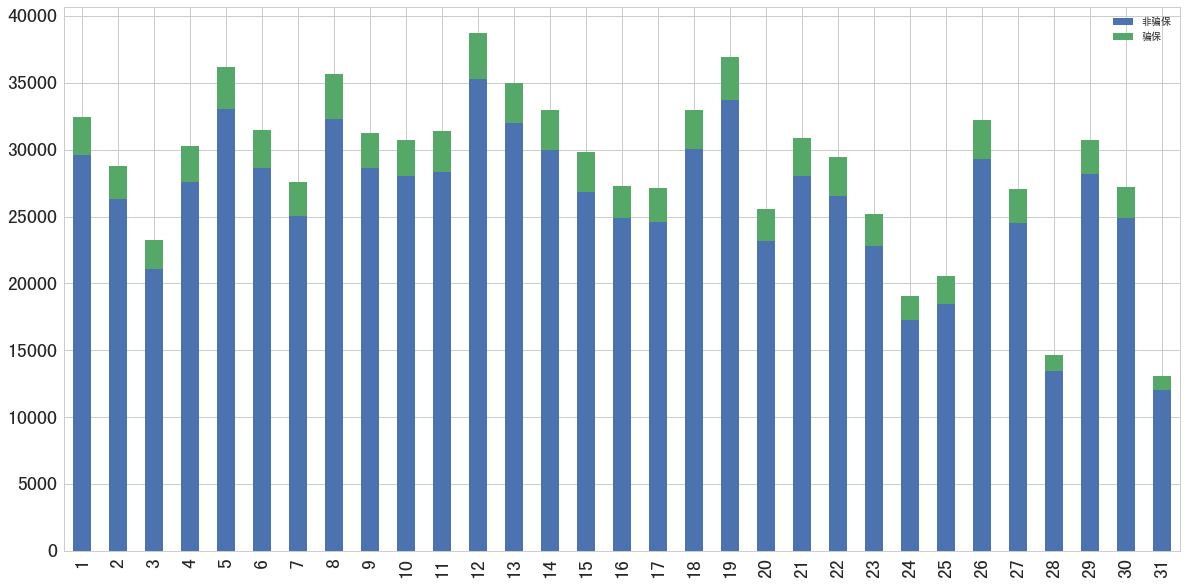

In [223]:

#研究一周当中中第几天对是否骗保的影响
fig,ax0=plt.subplots(figsize=(20, 10))
fig.set_figure(())
day_fault = data['一月日期名'][data['标签']==1].value_counts()
day_fault = day_fault.sort_index()
day_normal = data['一月日期名'][data['标签']==0].value_counts()
day_normal  = day_normal.sort_index()
df =pd.DataFrame({'非骗保':day_normal,'骗保':day_fault})
df.plot(kind='bar', stacked=True,ax=ax0)
plt.show()


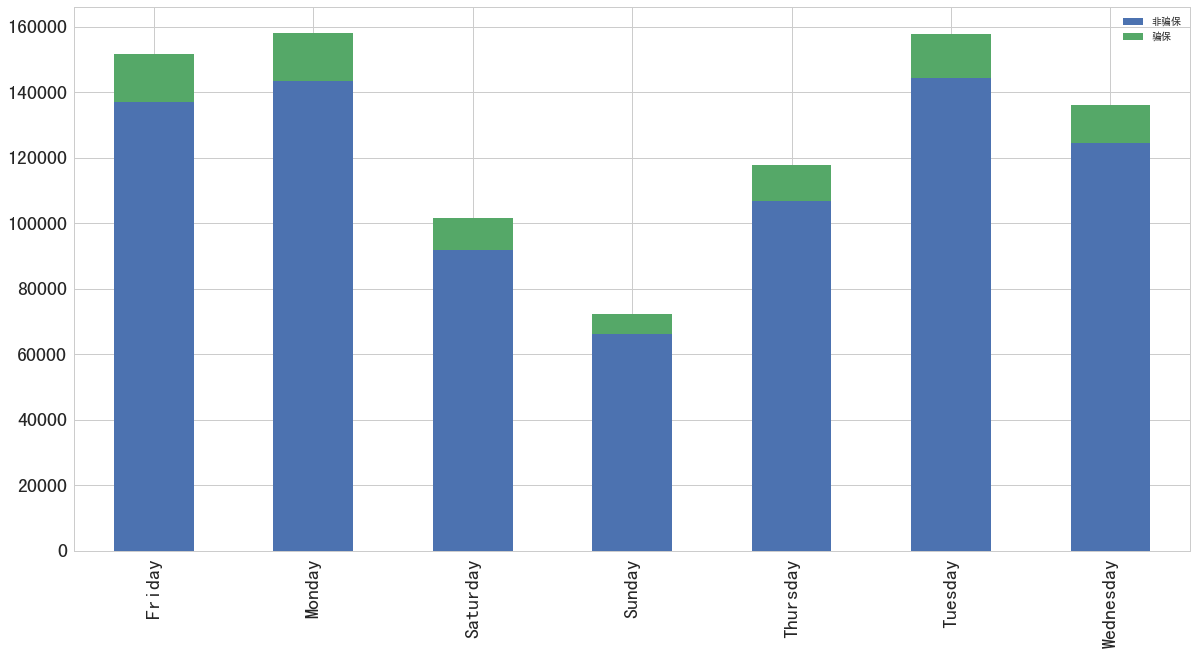

In [226]:
#研究一个月中第几天对是否骗保的影响
fig,ax0=plt.subplots(figsize=(20, 10))
fig.set_figure(())
day_fault = data['一周日期名'][data['标签']==1].value_counts()
day_fault = day_fault.sort_index()
day_normal = data['一周日期名'][data['标签']==0].value_counts()
day_normal  = day_normal.sort_index()
df =pd.DataFrame({'非骗保':day_normal,'骗保':day_fault})
df.plot(kind='bar', stacked=True,ax=ax0)
plt.show()

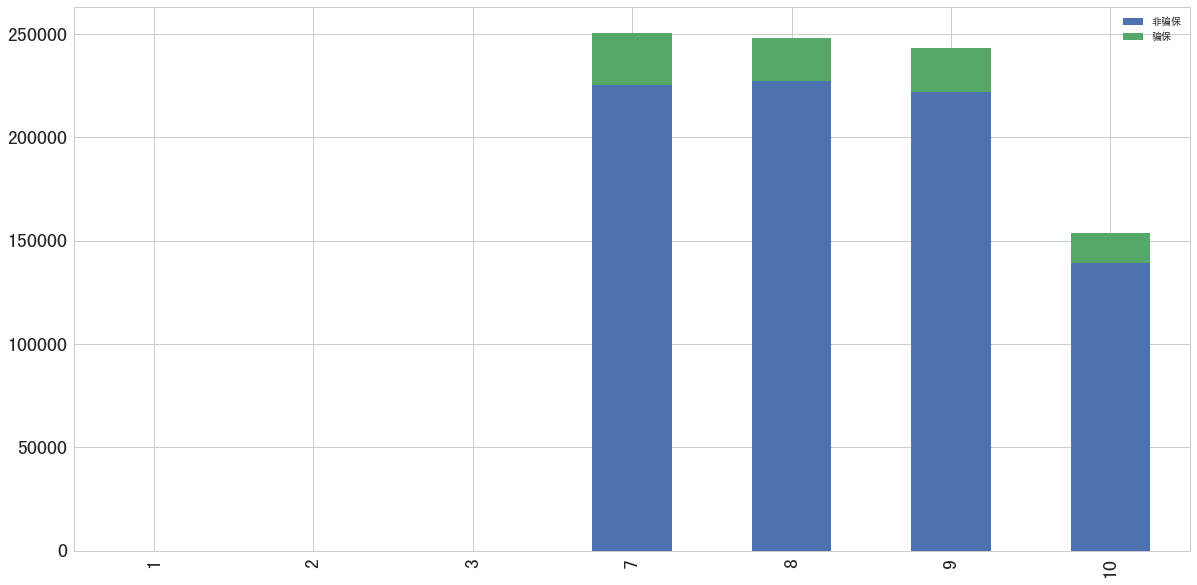

In [225]:
#研究月份名对是否骗保的影响

fig,ax0=plt.subplots(figsize=(20, 10))
fig.set_figure(())
day_fault = data['月份名'][data['标签']==1].value_counts()
day_fault = day_fault.sort_index()
day_normal = data['月份名'][data['标签']==0].value_counts()
day_normal  = day_normal.sort_index()
df =pd.DataFrame({'非骗保':day_normal,'骗保':day_fault})
df.plot(kind='bar', stacked=True,ax=ax0)
plt.show()

In [30]:
data.head()
data['检查费发生金额'].describe()

count    895420.000000
mean          6.756894
std          47.519840
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3760.000000
Name: 检查费发生金额, dtype: float64

In [41]:
data['检查费发生金额'].plot('kde',xlim=[0,50])


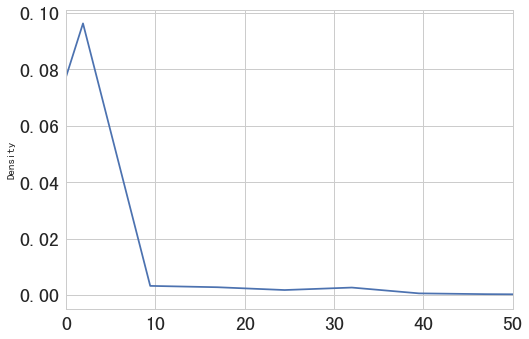

In [42]:
plt.show()

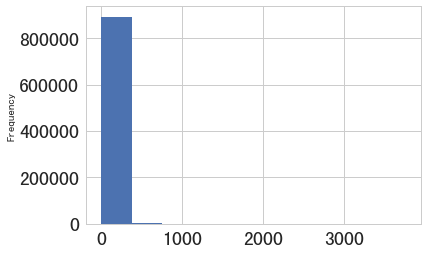

In [60]:
%matplotlib inline
data['检查费发生金额'].plot('hist')


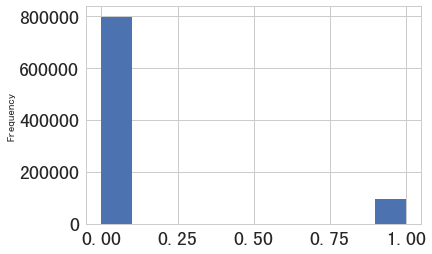

In [64]:
np.tanh(data['检查费发生金额']).plot('hist')

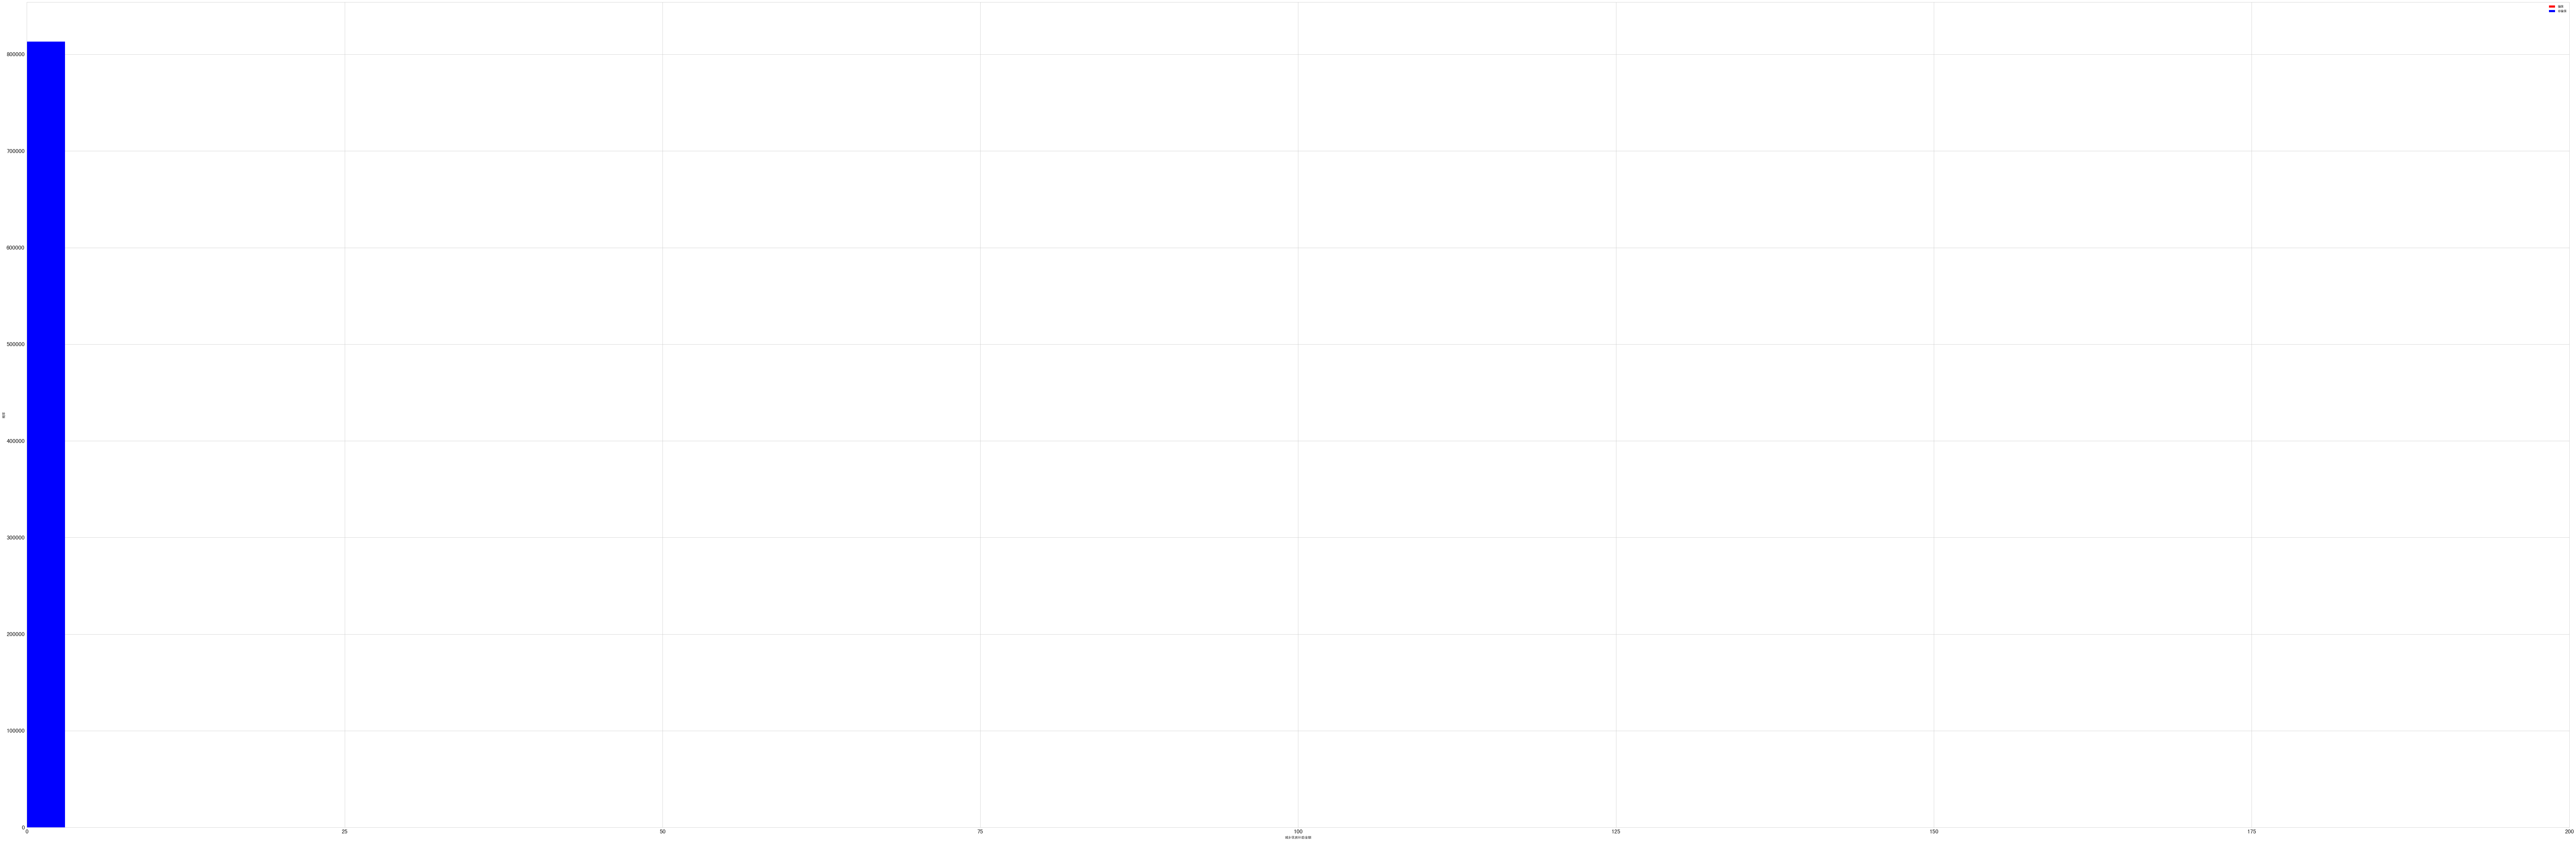

In [77]:
plot_kde_curve('城乡优抚补助金额')

In [79]:
data.columns

Index(['顺序号', '个人编码', '医院编码', '药品费发生金额', '贵重药品发生金额', '中成药费发生金额', '中草药费发生金额',
       '药品费自费金额', '药品费申报金额', '检查费发生金额', '贵重检查费金额', '检查费自费金额', '检查费申报金额',
       '治疗费发生金额', '治疗费自费金额', '治疗费申报金额', '手术费发生金额', '手术费自费金额', '手术费申报金额',
       '床位费发生金额', '床位费申报金额', '医用材料发生金额', '高价材料发生金额', '医用材料费自费金额', '成分输血申报金额',
       '其它发生金额', '一次性医用材料申报金额', '起付线标准金额', '起付标准以上自负比例金额', '医疗救助个人按比例负担金额',
       '基本医疗保险统筹基金支付金额', '交易时间', '可用账户报销金额', '基本医疗保险个人账户支付金额', '非账户支付金额',
       '双笔退费标识', '住院开始时间', '住院终止时间', '住院天数', '申报受理时间', '出院诊断病种名称', '本次审批金额',
       '医疗救助医院申请', '民政救助补助金额', '城乡优抚补助金额', '家床起付线剩余', '操作时间', '标签', '一月日期名',
       '一周日期名', '月份名'],
      dtype='object')

In [82]:
data[data.药品费发生金额!=0].head(10)

,顺序号,个人编码,医院编码,药品费发生金额,贵重药品发生金额,中成药费发生金额,中草药费发生金额,药品费自费金额,药品费申报金额,检查费发生金额,...,本次审批金额,医疗救助医院申请,民政救助补助金额,城乡优抚补助金额,家床起付线剩余,操作时间,标签,一月日期名,一周日期名,月份名
134,MT01801607015824933,352121207565605,180,295.43,0.00,0.00,0.0,19.27,275.60,0.0,...,275.60,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
181,MT08961607015826229,352121004377124,896,238.13,0.00,0.00,0.0,15.51,222.62,30.0,...,297.22,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
227,MT01801607015826539,352120001591277,180,276.54,0.00,0.00,0.0,0.02,275.39,0.0,...,275.39,0.0,33.73,0.0,0.0,2016-07-01,0,1,Friday,7
230,MT05671607015826641,352120000385458,567,476.70,0.00,152.95,0.0,31.05,445.65,60.0,...,505.65,0.0,0.00,0.0,0.0,2016-07-01,1,1,Friday,7
231,MT01161607015826644,352121005389990,116,81.80,0.00,0.00,0.0,0.00,81.80,0.0,...,81.80,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
232,MT01161607015826645,352121005389990,116,11.00,0.00,0.00,0.0,6.90,4.10,0.0,...,4.10,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
276,MT08961607015827388,352121000457083,896,221.98,0.00,0.00,0.0,14.46,207.52,30.0,...,237.52,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
309,MT05581607015827094,352120002673082,558,612.72,507.32,101.10,0.0,0.00,587.35,0.0,...,587.35,0.0,85.70,0.0,0.0,2016-07-01,1,1,Friday,7
317,MT01961607015827745,352120107162954,196,219.65,0.00,0.00,0.0,0.00,219.65,0.0,...,219.65,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7
331,MT01431607015827531,352120001475556,143,501.60,0.00,501.60,0.0,0.18,501.42,0.0,...,501.42,0.0,0.00,0.0,0.0,2016-07-01,0,1,Friday,7


In [83]:
352120002673082	558 612.72

SyntaxError: invalid syntax (<ipython-input-83-e0aa3d410bf3>, line 1)

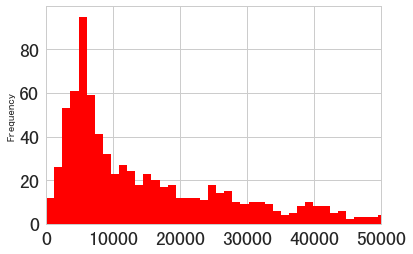

In [100]:
data[data['标签']==1].groupby('个人编码')['药品费发生金额'].sum().plot('hist',bins=100,xlim=[0,50000],color='r')
#data[data['标签']==0].groupby('个人编码')['药品费发生金额'].sum().plot('hist',bins=100,xlim=[0,50000],color='b')

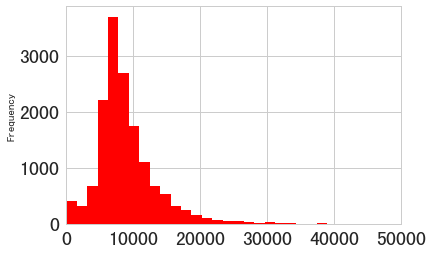

In [107]:
data[data['标签']==0].groupby('个人编码')['药品费发生金额'].sum().plot('hist',bins=100,xlim=[0,50000],color='r')


In [109]:
data[data['标签']==0].groupby(['个人编码','医院编码'])['药品费发生金额'].sum()

个人编码             医院编码
352120000000231  1121     3830.14
                 186      5713.60
                 555       433.44
352120000000386  170      6647.02
                 601       274.23
352120000000408  144       661.84
                 197      5693.94
352120000000409  140      3692.10
                 147        66.64
352120000000511  196      8612.24
352120000000674  145      1968.68
                 178       808.52
                 196      7401.80
352120000001361  145       519.83
                 196      1433.08
                 78        200.27
                 896     10457.40
352120000001462  182      2983.67
                 5        2465.51
                 791      6149.20
352120000001641  194      3276.82
                 567      6414.81
352120000001710  136       297.80
                 145      7016.71
                 188       148.04
                 567      4608.50
352120000001866  704      6321.16
                 98        136.79
352120000001950  567      

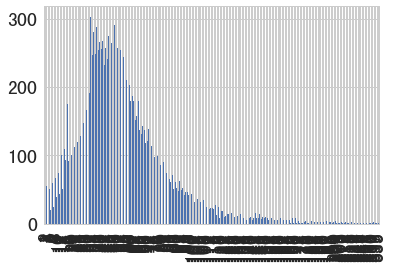

In [113]:
data[data['标签']==0].groupby('个人编码')['医院编码'].count().value_counts().sort_index().plot('bar')